In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yashvrdnjain/hotdognothotdog")

print("Path to dataset files:", path)

100%|██████████| 166M/166M [00:08<00:00, 20.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yashvrdnjain/hotdognothotdog/versions/1


In [2]:
import pandas as pd
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, Model


In [3]:
directory = f'{path}/hotdog-nothotdog/train/'
test_directory = f'{path}/hotdog-nothotdog/test/'

In [14]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,      # 20% validation split
    rotation_range=20,         # randomly rotate images by 0–20 degrees
    width_shift_range=0.1,     # randomly shift images horizontally (10% of width)
    height_shift_range=0.1,    # vertically (10% of height)
    shear_range=0.2,           # shear angle in counter-clockwise direction
    zoom_range=0.2,            # zoom in/out
    horizontal_flip=True,      # randomly flip images horizontally
    fill_mode='nearest'        # how to fill in newly created pixels
)

# Validation data generator — no augmentation
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training generator
train_dataset = train_datagen.flow_from_directory(
    directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=123
)

# Validation generator
val_dataset = val_datagen.flow_from_directory(
    directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=123
)

test_dataset = image_dataset_from_directory(
    test_directory,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,
    seed=123
)


Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 644 files belonging to 2 classes.


In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
inputs = base_model.input
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [9]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='hotdog_convnet.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [10]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 69s 725ms/step - accuracy: 0.6031 - loss: 0.6679 - val_accuracy: 0.7600 - val_loss: 0.5491
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 495ms/step - accuracy: 0.7149 - loss: 0.5637 - val_accuracy: 0.7817 - val_loss: 0.4901
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 491ms/step - accuracy: 0.7632 - loss: 0.5027 - val_accuracy: 0.7950 - val_loss: 0.4593
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 492ms/step - accuracy: 0.7580 - loss: 0.5000 - val_accuracy: 0.8217 - val_loss: 0.4245
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 493ms/step - accuracy: 0.7805 - loss: 0.4732 - val_accuracy: 0.8300 - val_loss: 0.4073
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 496ms/step - accuracy: 0.7875 - loss: 0.4600 - val_accuracy: 0.8517 - val_loss: 0.3731
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 491ms/step - accuracy: 0.8097 - loss: 0.4195 - val_accuracy: 0.8500 - val_loss: 0.3587
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 493ms/step - accuracy: 0.7973 - loss: 0.4349 - val_accu

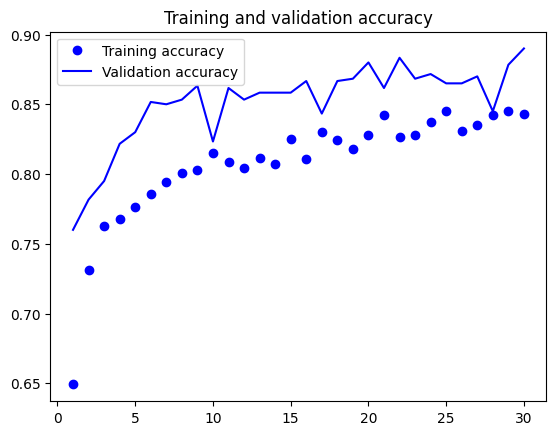

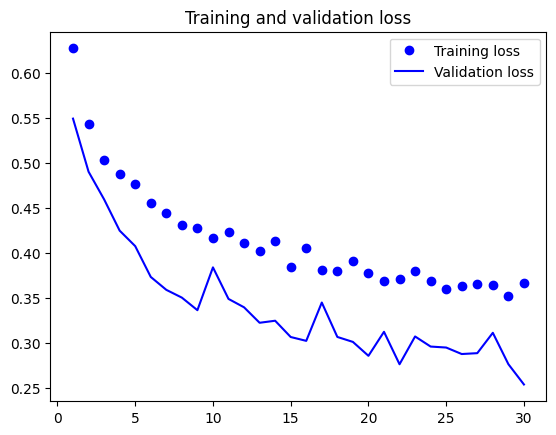

In [11]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(dataset, model_arg):
    Y_true = []
    Y_pred = []
    # Loop through the batches in the original 3-channel dataset
    for images, labels in dataset:
        predictions = model_arg.predict(images)
        Y_true.extend(labels)
        Y_pred.extend(np.round(predictions).flatten())  # round for binary labels
    # Convert to arrays for metrics
    Y_true = np.array(Y_true)
    Y_pred = np.array(Y_pred)
    # Compute metrics
    accuracy = accuracy_score(Y_true, Y_pred)
    precision = precision_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    f1 = f1_score(Y_true, Y_pred)
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")


evaluate(test_dataset, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Accuracy:  0.7593
Precision: 0.6876
Recall:    0.9503
F1 Score:  0.7979
